In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os

In [2]:
def loca2_processing(scenario, variable, year_start, year_end, freq, timeindex=None):
    
    base_directory = "/data/keeling/a/cristi/a/downscaled_data/LOCA2/"
    models = next(os.walk(base_directory))[1]
    #time index to assign model times to
    #new_time_index=pd.date_range(start='2015-01-01',freq='D',periods=10958)

    list_dataset_model = []
    for model in models:
        print(model)
        directory = base_directory +  model + '/' + scenario + '/'
        all_files = glob.glob(directory + '/*')
        
        ens_mem = []
        for file in all_files:
            ens_mem.append(file.split('.')[3])
        if not ens_mem:
            continue
        list_dataset_mem = []
        for mem in list(set(ens_mem)):
            if scenario == 'historical':
                files_mem = glob.glob(directory + '/' + variable + '.' + model + '.' + scenario + '.' + mem + '.' 
                                       + '*')
            else:
                files_mem = glob.glob(directory + '/' + variable + '.' + model + '.' + scenario + '.' + mem + '.' 
                                  + timeindex + '.' + '*')
            dataset_mem = xr.open_mfdataset(files_mem,combine="by_coords", use_cftime=True)
            dataset_mem = dataset_mem.assign(time=pd.date_range(start=(str(dataset_mem.time[0].values).split(' ')[0]),
                                            freq=freq,
                                            periods=len(dataset_mem.time))).sel(time=slice(str(year_start), str(year_end)))
            print(dataset_mem)
            dataset_mem['ens_mem'] = mem
            list_dataset_mem.append(dataset_mem)
        if len(list_dataset_mem) == 1:
            #dataset_model = list_dataset_mem[0].assign_coords({'ens_mem':list(set(ens_mem))[0]})
            dataset_model = list_dataset_mem[0]
        else:
            dataset_model = xr.concat(list_dataset_mem, dim='ens_mem', coords='minimal', compat='override')
            dataset_model = dataset_model.mean('ens_mem')
        dataset_model['name'] = model
        dataset_model = dataset_model.sel(lat=slice(36.9,42.6)).sel(lon=slice(268.4,272.5))
        list_dataset_model.append(dataset_model)
    dataset = xr.concat(list_dataset_model, dim='name', coords='minimal', compat='override')
    return dataset

# Precipitation

In [52]:
dataset = loca2_processing('historical', 'pr', 1994, 2014, 'D')
dataset

ACCESS-CM2
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 16:21:05.748919 /net/mead24/data/LOCA2_CONUS...
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 16:00:11.25382 /net

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-23 18:19:53.201528 /net/mead24/data/LOCA2_CONUS...
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-23 19:34:03.374703 /net/mead24/da

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-23 23:22:24.930455 /net/mead24/data/LOCA2_CONUS...
EC-Earth3
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 05:22:49.884045 /net

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 22:11:21.921172 /net/mead24/data/LOCA2_CONUS...
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 22:00:43.679828 /net/mead24/da

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 13:58:19.046142 /net/mead24/data/LOCA2_CONUS...
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 13:48:41.664394 /net/mead24/da

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 19:12:48.328665 /net/mead24/data/LOCA2_CONUS...
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 19:55:24.462689 /net/mead24/da

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 17:14:23.466685 /net/mead24/data/LOCA2_CONUS...
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 17:52:22.08192 /net/mead24/dat

<xarray.Dataset>
Dimensions:  (lon: 66, lat: 92, time: 7670, name: 27)
Coordinates:
  * lon      (lon) float64 268.4 268.5 268.5 268.6 ... 272.3 272.3 272.4 272.5
  * lat      (lat) float64 36.91 36.97 37.03 37.09 ... 42.41 42.47 42.53 42.59
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
  * name     (name) <U15 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorESM2-MM' 'TaiESM1'
Data variables:
    pr       (name, time, lat, lon) float32 dask.array<chunksize=(1, 7670, 92, 66), meta=np.ndarray>

In [53]:
dataset.load()

<xarray.Dataset>
Dimensions:  (lon: 66, lat: 92, time: 7670, name: 27)
Coordinates:
  * lon      (lon) float64 268.4 268.5 268.5 268.6 ... 272.3 272.3 272.4 272.5
  * lat      (lat) float64 36.91 36.97 37.03 37.09 ... 42.41 42.47 42.53 42.59
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
  * name     (name) <U15 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorESM2-MM' 'TaiESM1'
Data variables:
    pr       (name, time, lat, lon) float32 1.15e-05 1.268e-05 ... nan nan

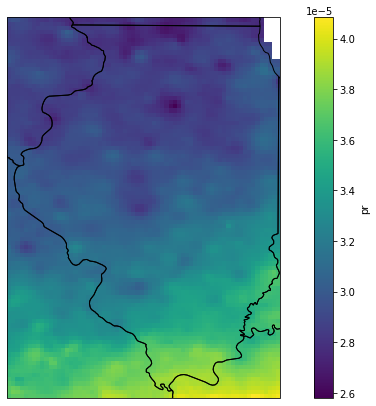

In [56]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
dataset.pr.mean('time').mean('name').plot()
ax.add_feature(cfeature.STATES)

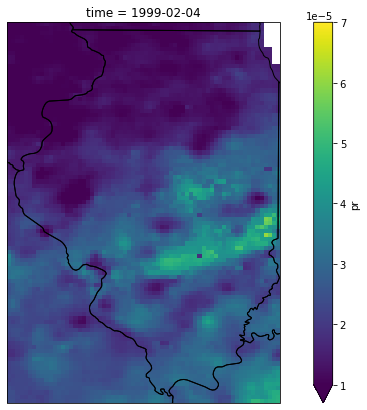

In [60]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
dataset.pr.sel(time='1999-02-04').mean('name').plot(vmin=1e-5, vmax=7e-5)
ax.add_feature(cfeature.STATES)

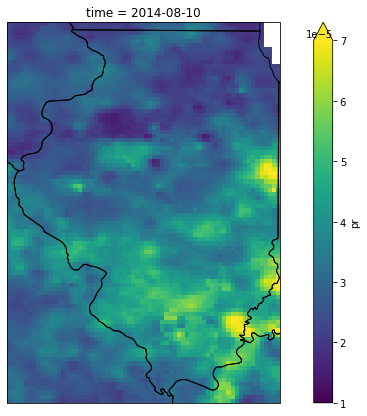

In [61]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
dataset.pr.sel(time='2014-08-10').mean('name').plot(vmin=1e-5, vmax=7e-5)
ax.add_feature(cfeature.STATES)

# TASMAX

In [4]:
dataset_tasmax = loca2_processing('historical', 'tasmax', 1994, 2014, 'D')
dataset_tasmax

ACCESS-CM2
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2023-08-12 19:53:05.68217 /net/mead24/data/LOCA2_CONUS_...
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2023-08-12 10:19:41.132431 /ne

/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': Tr

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2023-08-06 20:32:25.961241 /net/mead24/data/LOCA2_CONUS...
CESM2-LENS
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2023-07-23 14:57:50.955406 /ne

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2023-07-26 00:15:34.632718 /net/mead24/data/LOCA2_CONUS...
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2023-07-25 16:07:57.445554 /net/mead24/da

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2023-07-29 03:21:35.05809 /net/mead24/data/LOCA2_CONUS_...
GFDL-CM4
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2023-07-30 15:49:54.225765 /net/

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2023-08-06 04:26:52.71425 /net/mead24/data/LOCA2_CONUS_...
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2023-08-05 23:32:32.717323 /net/mead24/da

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2023-08-13 20:58:33.122883 /net/mead24/data/LOCA2_CONUS...
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2023-08-14 04:39:33.59423 /net/mead24/dat

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2023-07-24 03:14:08.882841 /net/mead24/data/LOCA2_CONUS...
MRI-ESM2-0
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 7670)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(7670, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2023-08-13 08:32:55.985191 /ne

<xarray.Dataset>
Dimensions:  (lon: 66, lat: 92, time: 7670, name: 27)
Coordinates:
  * lon      (lon) float64 268.4 268.5 268.5 268.6 ... 272.3 272.3 272.4 272.5
  * lat      (lat) float64 36.91 36.97 37.03 37.09 ... 42.41 42.47 42.53 42.59
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
  * name     (name) <U15 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorESM2-MM' 'TaiESM1'
Data variables:
    tasmax   (name, time, lat, lon) float32 dask.array<chunksize=(1, 7670, 92, 66), meta=np.ndarray>

In [5]:
dataset_tasmax.load()

<xarray.Dataset>
Dimensions:  (lon: 66, lat: 92, time: 7670, name: 27)
Coordinates:
  * lon      (lon) float64 268.4 268.5 268.5 268.6 ... 272.3 272.3 272.4 272.5
  * lat      (lat) float64 36.91 36.97 37.03 37.09 ... 42.41 42.47 42.53 42.59
  * time     (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2014-12-31
  * name     (name) <U15 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorESM2-MM' 'TaiESM1'
Data variables:
    tasmax   (name, time, lat, lon) float32 280.0 280.0 279.7 ... nan nan nan

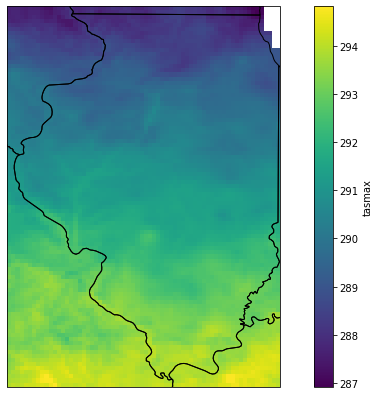

In [6]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
dataset_tasmax.tasmax.mean('time').mean('name').plot()
ax.add_feature(cfeature.STATES)

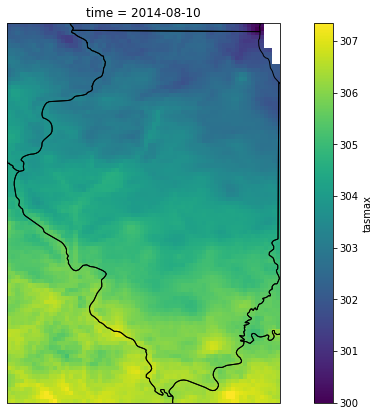

In [12]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
dataset_tasmax.tasmax.sel(time='2014-08-10').mean('name').plot()
ax.add_feature(cfeature.STATES)

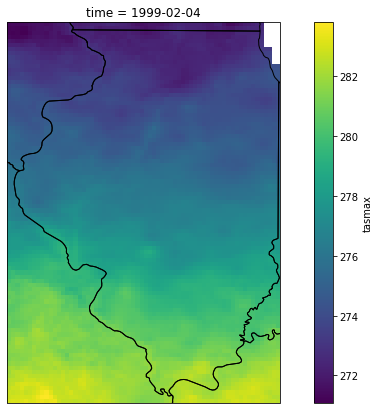

In [13]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
dataset_tasmax.tasmax.sel(time='1999-02-04').mean('name').plot()
ax.add_feature(cfeature.STATES)